# Limpieza de datos

Realice las operaciones y describa lo que va encontrando


## 1. Vista rápida al dataset


In [3]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Lectura
df = pd.read_csv("dataset_videojuegos.csv")
df

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


## 2. Datos duplicados

In [6]:
duplicadas = df.duplicated().sum()
duplicadas

0

Como podemos ver, al realizar la ejecucion del codigo anterior, podemos comprobar que no habia datos duplicados

## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [9]:
# Contar los datos faltantes
df.isnull().sum().sort_values(ascending=False)

# La cantidad de datos faltantes y el porcentaje por la columna
for col in df.columns:
    porcentaje = (df[col].isnull().sum() / len(df)) * 100
    if porcentaje > 0: #Filtra solo los que tengan valores faltantes
        print(f"Filas faltantes en '{col}': {df[col].isnull().sum()}. porcentaje: {porcentaje:.2f}%")

Filas faltantes en 'summary': 114. porcentaje: 0.61%


Como podemos observar, en la columna 'summary' es la unica que se encuentran datos nulos, los cuales son 114

In [11]:
# Enlistamos los valores que tienen valores nulos en summary
print("Valores faltantes en la columna 'summary'", df['summary'].isnull().sum())
df[df['summary'].isnull()]

Valores faltantes en la columna 'summary' 114


,name,platform,release_date,summary,meta_score,user_review
833,Injustice 2: Legendary Edition,PlayStation 4,"March 27, 2018",NaN,88,7.6
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",NaN,86,tbd
1535,Mini Metro,Switch,"August 30, 2018",NaN,86,8.4
1649,Out of the Park Baseball 13,PC,"April 9, 2012",NaN,85,7.8
2427,Guild Wars 2: Path of Fire,PC,"September 22, 2017",NaN,83,7.3
...,...,...,...,...,...,...
17999,One Piece: Unlimited Cruise SP,PlayStation 4,"February 10, 2012",NaN,46,7.0
18134,AeternoBlade II,Wii U,"October 11, 2019",NaN,44,4.4
18253,Surgeon Simulator: Experience Reality,PlayStation 4,"December 3, 2016",NaN,43,4.3
18532,The Ripping Friends,Game Boy Advance,"March 24, 2002",NaN,38,tbd


In [12]:
# Sustituimos los valores 'NaN' por un valor especifico 'Unknown'
df.fillna({'summary': "Unknown"}, inplace = True)
print("Valores faltantes en la columna 'summary'", df['summary'].isnull().sum())

Valores faltantes en la columna 'summary' 0


In [13]:
# Verificar nuevamente que no hay datos nulos
print("Valores nulos después de la limpieza:")
print(df.isnull().sum())

Valores nulos después de la limpieza:
name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64


## 4. Verifique outlaiers de cada fila

In [15]:
count_tbd = df[df['user_review'] == 'tbd'].shape[0]
print(f'Número de filas con "tbd" en "user_review": {count_tbd}')

Número de filas con "tbd" en "user_review": 1365


In [16]:
# Observamos que la columna de 'user_review' contiene un dato inconsistente que lo cambiaremos por 'Unknown'
# El valor que sustituiremos es 'tbd'
# Reemplazar solo las filas donde 'user_review' tiene 'tbd'
df.loc[df['user_review'] == 'tbd', 'user_review'] = 'Unknown'

In [17]:
count_tbd = df[df['user_review'] == 'tbd'].shape[0]
print(f'Número de filas con "tbd" en "user_review": {count_tbd}')

Número de filas con "tbd" en "user_review": 0


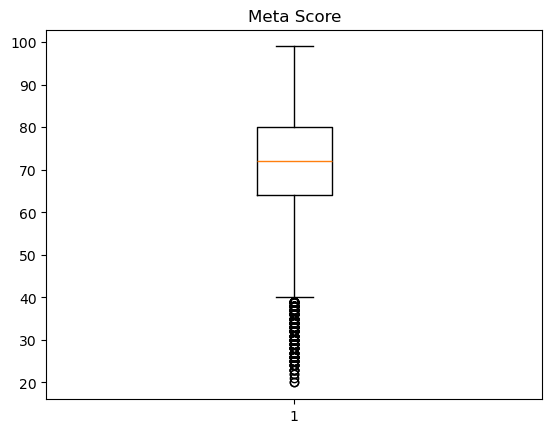

In [18]:
# Creates a boxplot
plt.boxplot(df['meta_score'])
plt.title('Meta Score')
plt.show()

## 4.1 Datos numéricos

## 4.2 Datos categóricos

In [21]:
# eliminar espacios delanteros y finales de diferentes columnas
df['platform'] = df['platform'].apply( lambda x: x.strip())
df

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [22]:
# Analizar la columna 'platform'
df['platform'].value_counts()

platform
PC                  4864
PlayStation 4       2056
Xbox 360            1644
PlayStation 2       1414
Switch              1399
PlayStation 3       1256
Xbox One            1179
Xbox                 789
DS                   720
Wii                  655
PSP                  512
GameCube             448
Game Boy Advance     438
3DS                  396
PlayStation Vita     257
PlayStation          187
Wii U                184
Dreamcast            125
PlayStation 5        124
Xbox Series X         77
Nintendo 64           71
Stadia                 5
Name: count, dtype: int64

In [23]:
# Podemos elimnar las filas con la plataforma de 'Stadia' ya que al ser tan pocos registros no afecta a nuestro dataset
df = df[df['platform'] != 'Stadia']
# Verificamos que se eliminaron
df['platform'].value_counts()

platform
PC                  4864
PlayStation 4       2056
Xbox 360            1644
PlayStation 2       1414
Switch              1399
PlayStation 3       1256
Xbox One            1179
Xbox                 789
DS                   720
Wii                  655
PSP                  512
GameCube             448
Game Boy Advance     438
3DS                  396
PlayStation Vita     257
PlayStation          187
Wii U                184
Dreamcast            125
PlayStation 5        124
Xbox Series X         77
Nintendo 64           71
Name: count, dtype: int64

In [39]:
# Guardar los datos en un dataset nuevo y limpio
df.to_csv("dataset_videojuegos_clean.csv")